In [14]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from scipy import stats


In [15]:
trainingData = pd.read_csv('/Users/maykalnik/ML-7641-Team14-main/dataset/output/dataset_mar_23/train.csv')
validationData = pd.read_csv('/Users/maykalnik/ML-7641-Team14-main/dataset/output/dataset_mar_23/val.csv')

#train
trainingX = trainingData[['num_sub', 'views per day','likes per day', 'dislikes per day', 'comments per day', 'rating']]
trainingY = trainingData['trending']

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(trainingX, trainingY)
Pipeline(steps=[('standardscaler', StandardScaler()),('svc', SVC(gamma='auto'))])

#validation
val = validationData[['num_sub', 'views per day','likes per day', 'dislikes per day', 'comments per day', 'rating']]
actual = validationData[['trending']]
pred = clf.predict(val)

#metrics
print(type(actual))
print(type(pred))
accuracy = sk.metrics.accuracy_score(actual, pred)
precision = sk.metrics.precision_score(actual, pred)
recall = sk.metrics.recall_score(actual, pred)
fOne = sk.metrics.f1_score(actual, pred)


#print("actual: ", actual)
#print("predicted: ", pred)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", fOne)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
accuracy:  0.8844731977818854
precision:  0.9474885844748858
recall:  0.8027079303675049
F1:  0.8691099476439791


In [16]:
with open("SVC_val_pred.txt", "w") as file:
    file.write(np.array2string(pred, threshold=np.inf))

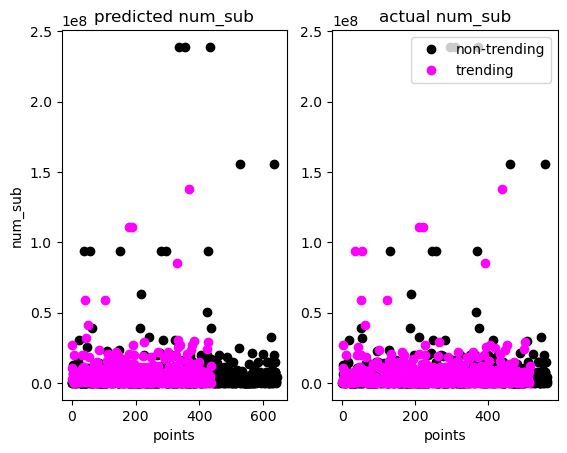

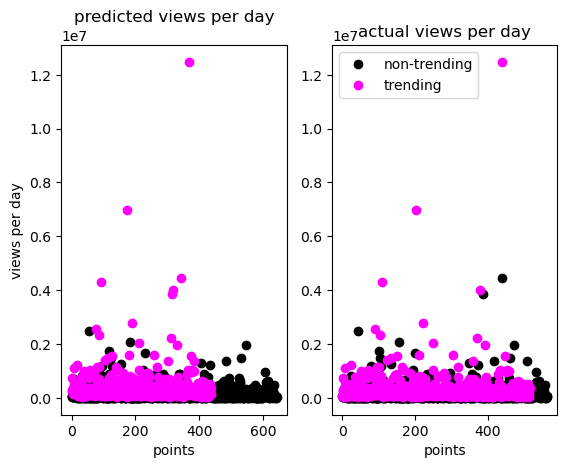

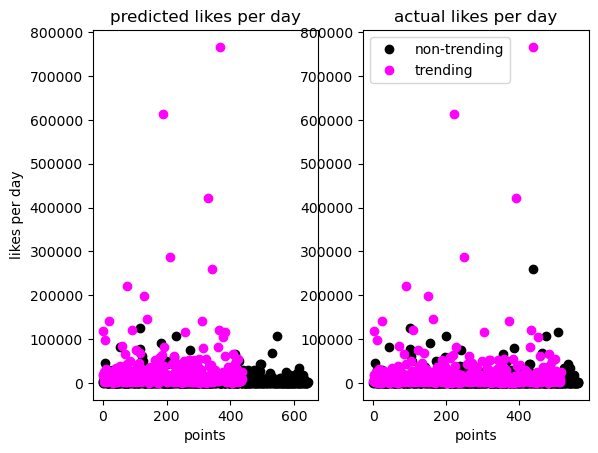

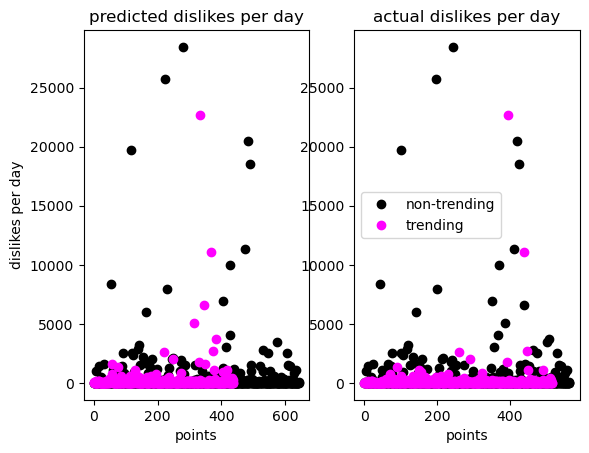

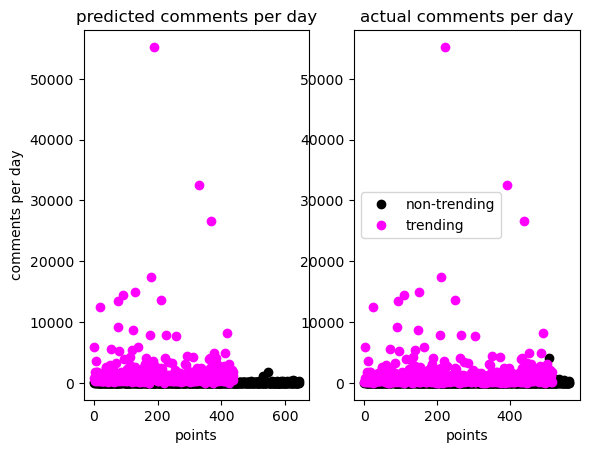

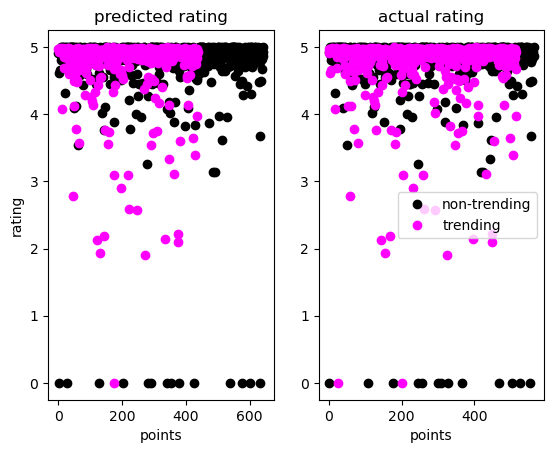

In [17]:
features = [6, 9,10,11, 12, 14]

for i in range (len(features)):
# Plot 1: predicted
    plt.subplot(1, 2, 1) 
    # trending testing
    points = validationData.to_numpy()[np.where(pred == 0)[0]]
    plt.plot(points[:, features[i]], 'o', color="black", label = 'non-trending')

    # non trending testing
    points = validationData.to_numpy()[np.where(pred == 1)[0]]
    plt.plot(points[:, features[i]],'o', color="magenta", label = 'trending')
    
    
    plt.title("predicted " + trainingData.columns[features[i]])
    plt.ylabel(trainingData.columns[features[i]])
    plt.xlabel("points")
    

# Plot 2: actual
    plt.subplot(1, 2, 2) 
    #trending testing
    points = validationData.to_numpy()[np.where(actual == 0)[0]]
    plt.plot(points[:, features[i]], 'o', color="black", label = 'non-trending')

    # non trending testing
    points = validationData.to_numpy()[np.where(actual == 1)[0]]
    plt.plot(points[:, features[i]],'o', color="magenta", label = 'trending')
    
    plt.title("actual " + trainingData.columns[features[i]])
    plt.xlabel("points")
    plt.legend()
    plt.show()

    

In [18]:

trainingXX = trainingX.to_numpy()
trainingXX = np.where(trainingXX==0, .001, trainingX)
for i in range (len(trainingX.columns)):
    trainingXX [:, i], a = stats.boxcox(trainingXX[:,i], lmbda=None)

pca = PCA(n_components=2, random_state=100)
pca.fit(trainingXX)
clfPCA = pca.transform(trainingXX)



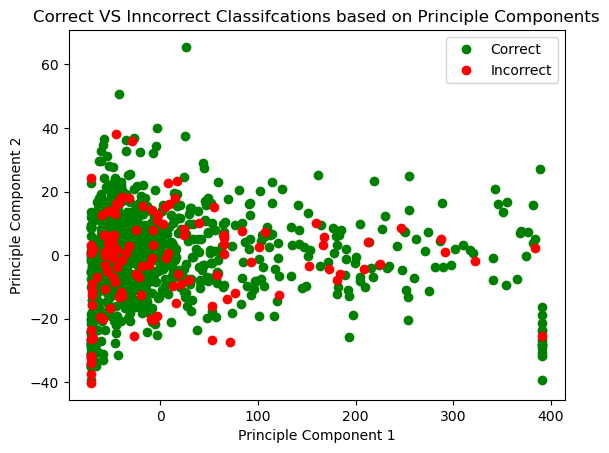

In [19]:

a = actual.to_numpy().flatten()
plt.plot(clfPCA[np.where(a == pred)[0], 0], clfPCA[np.where(a == pred)[0], 1],'o', color="green", label = 'Correct')

plt.plot(clfPCA[np.where(a != pred)[0], 0], clfPCA[np.where(a != pred)[0], 1],'o', color="red", label = 'Incorrect')
plt.title("Correct VS Inncorrect Classifcations based on Principle Components")
plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.legend()
plt.show()


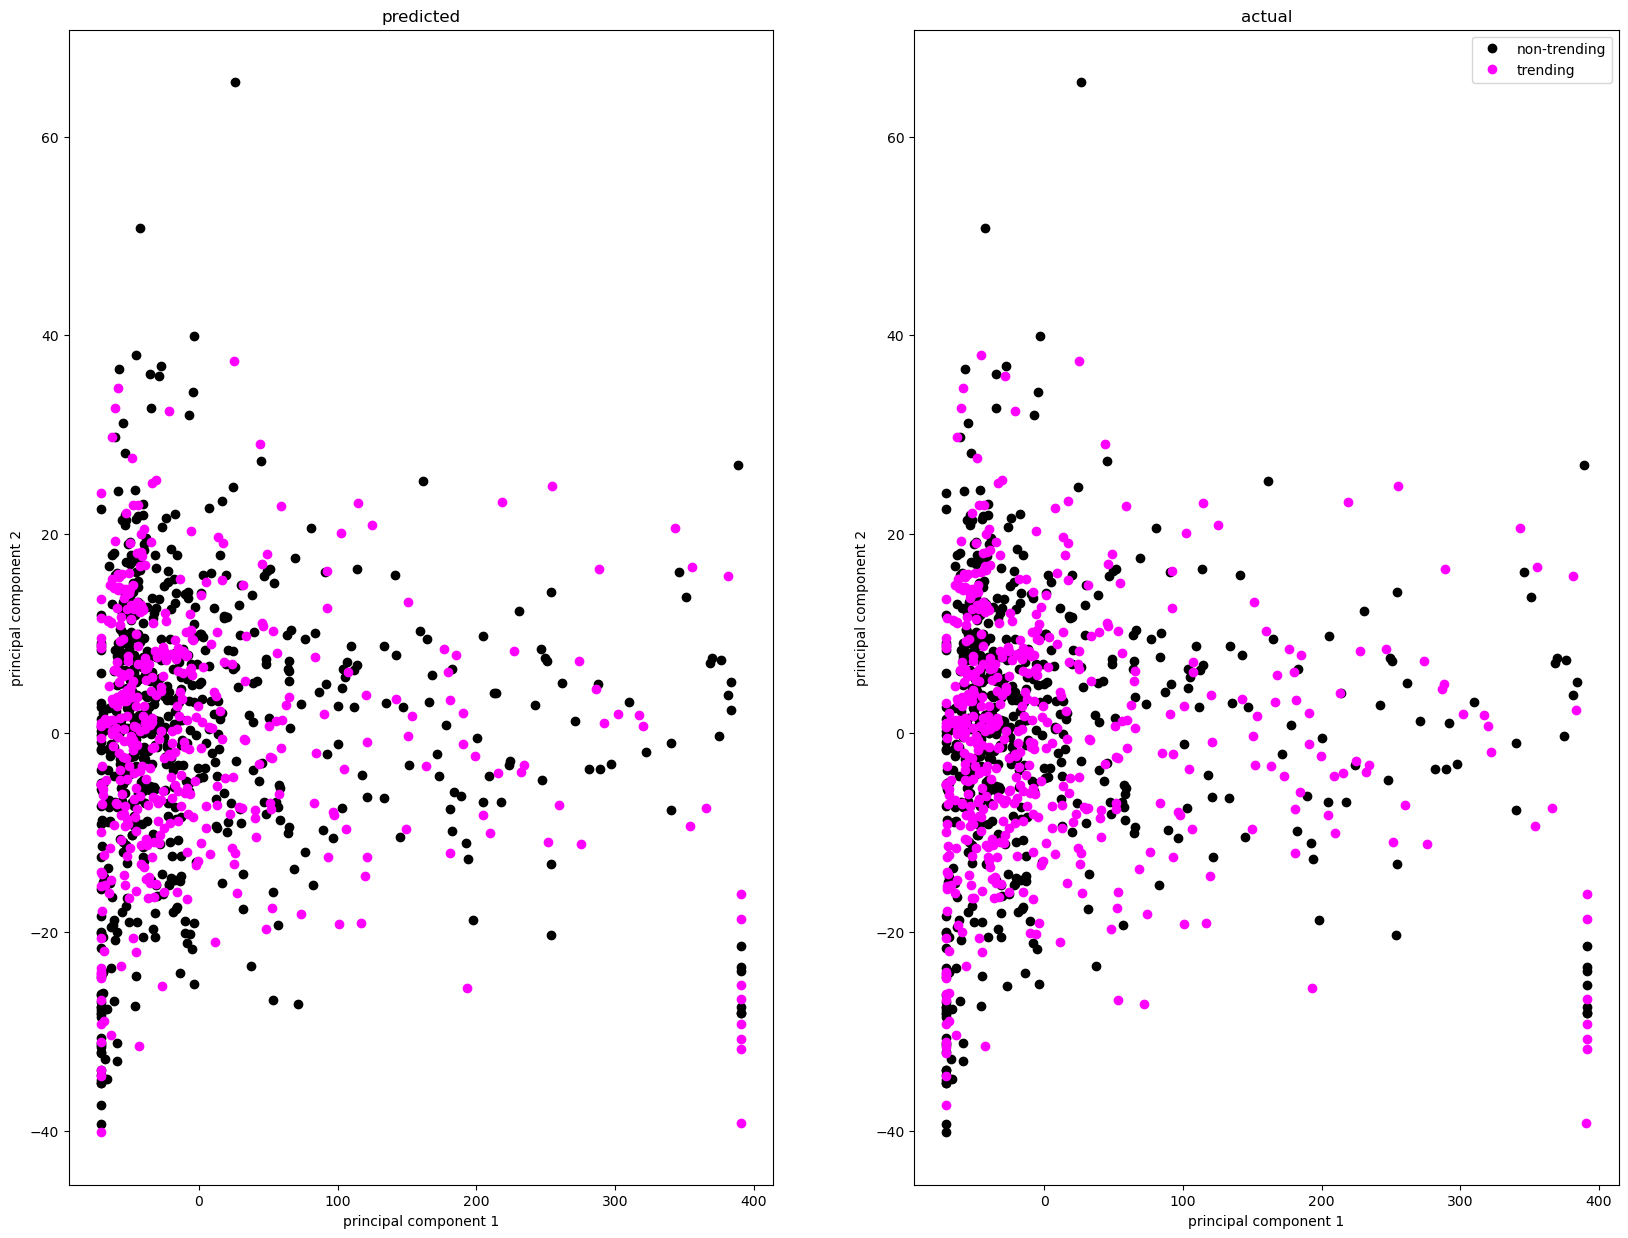

In [20]:

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
# Plot 1: predicted
plt.subplot(1, 2, 1) 
# trending 
plt.plot(clfPCA[np.where(pred == 0)[0], 0], clfPCA[np.where(pred == 0)[0], 1],'o', color="black", label = 'trending')
# non-trending
plt.plot(clfPCA[np.where(pred == 1)[0], 0], clfPCA[np.where(pred == 1)[0], 1],'o', color="magenta", label = 'non- trending')

plt.title("predicted")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

# Plot 2: actual
plt.subplot(1, 2, 2) 
# trending 
plt.plot(clfPCA[np.where(actual == 0)[0], 0], clfPCA[np.where(actual == 0)[0], 1],'o', color="black", label = 'trending')
# non-trending
plt.plot(clfPCA[np.where(actual == 1)[0], 0], clfPCA[np.where(actual == 1)[0], 1],'o', color="magenta", label = 'non- trending')

plt.title("actual")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
    
plt.legend(["non-trending", "trending"])
plt.show()

    